In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options




In [2]:

class flipkart_fashion:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.flipkart.com/search?q={self.items}'   
        self.pageurl2=f'https://www.flipkart.com/search?q={self.items}&page='
    cardClass = '_1xHGtK'
    nameCard='_2WkVRV'
    descriptionClass='IRpwTa'
    priceClass="_30jeq3"
    imageClass='_2r_T1I'
    hrefClass='IRpwTa'
    
class amazon:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2'
        self.pageurl2=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2&page='
    cardClass='s-search-result'
    nameCard='a-size-base-plus a-color-base'
    descriptionClass='a-size-base-plus a-color-base a-text-normal'
    priceClass='a-price-whole'
    imageClass='s-image'
    hrefClass='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'
class myntra:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.myntra.com/{self.items}'
        self.pageurl2=f'https://www.myntra.com/{self.items}?p='
    cardClass='product-base'
    nameCard='product-brand'
    descriptionClass='product-product'
    priceClass='product-discountedPrice'
    imageClass='img-responsive'
    hrefClass='_blank'
    

In [3]:
itemName= 'pants'
itemName='%20'.join(itemName.strip().split())


In [4]:
keyWords=[]
itemList=[]

In [5]:
websites = [flipkart_fashion(itemName),amazon(itemName),myntra(itemName)]
namewebsites=['flipkart','amazon','myntra']


itemName ='%20'.join(input().split())


In [6]:

def setlist(item,nameCard,descriptionClass,priceClass,websitewhich,imageClass,hrefClass):
    if str(websitewhich)=='flipkart':
        name=item.find('div',class_=nameCard).text
        dis=item.find('a',class_=descriptionClass)['title']
        price=item.find('div',class_=priceClass).text[1:]
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']

        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.flipkart.com'+str(href)]
    elif str(websitewhich)=='amazon':
        name=item.find('span',class_=nameCard).text
        dis=item.find('span',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price='0'
        else:
            price=price.text
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']
        
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.amazon.com'+str(href)]
    elif str(websitewhich)=='myntra':
        name=item.find('h3',class_=nameCard).text
        dis=item.find('h4',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price=item.find('div',class_='product-price')
            if price==None:
                price='0'
            else:
                price=price.text[3:]
        else:
            price=price.text[3:]
        if item.find('img',class_=imageClass)==None:
            img='not available'
        else:
            img=item.find('img',class_=imageClass)['src']
        href=item.find('a')['href']
        # if len(price)>3:
        #     price=price[3:]
        # if price==None:
        #     price=0
        print(price)
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.myntra.com/'+str(href)]
        

In [7]:
WINDOW_SIZE = "1920,1080"
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)

In [8]:
for no,i in enumerate(websites):
    cardClass=i.cardClass
    nameCard=i.nameCard
    descriptionClass=i.descriptionClass
    priceClass=i.priceClass
    imageClass=i.imageClass
    pageurl=i.pageurl
    pageurl2=i.pageurl2
    hrefClass=i.hrefClass
    # itemPage=requests.get(pageurl,headers={'User-Agent': 'Mozilla/5.0'}).content
    for enum in range(1,6):
        
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(pageurl2+str(enum))
        itemPage=driver.page_source
        idk = BeautifulSoup(itemPage,'html.parser')
        # driver.close()
        if namewebsites[no]=='flipkart':
            itemCards=idk.find_all('div',class_=cardClass)[1:]
        elif namewebsites[no]=='amazon':
            itemCards=idk.find_all('div',{'data-component-type': 's-search-result'})
        elif namewebsites[no]=='myntra':
            itemCards=idk.find_all('li',class_=cardClass)
    

        itemList.extend([setlist(item,nameCard,descriptionClass,priceClass,namewebsites[no],imageClass,hrefClass) for item in itemCards])

In [9]:
file=open('temp.txt','w')

In [10]:

print(itemList)
table=pd.DataFrame(itemList)
table=table.sort_values(by=2)
table.to_excel('data.xlsx')


[['METRONAUT By Flipkart', 'Slim Fit Men Polycotton Black Polycotton Trousers', 499.0, 'https://rukminim1.flixcart.com/image/612/612/l02r1jk0/trouser/4/g/r/44-p-st-bk-playerz-original-imagbxg5bfazwzsp.jpeg?q=70', 'https://www.flipkart.com/metronaut-slim-fit-men-polycotton-black-trousers/p/itm1d2e5895ff33a?pid=TROGG68C2MFRCHFH&lid=LSTTROGG68C2MFRCHFHDMURC7&marketplace=FLIPKART&q=pants&store=clo%2Fvua&srno=s_1_2&otracker=search&iid=en_1KBnOP3KX299evoNk67WJskxx9AZGaWj6%2BcoHtS59PYubqVpREqfRFy%2B0Yu%2BS0yrW%2FC0Rfq8LmUbHs2iTCiEvw%3D%3D&ssid=41wogklisw0000001681743824470&qH=ca425b88f047ce8e'], ['PETER ENGLAND', 'Men Slim Fit Grey Viscose Rayon Trousers', 881.0, 'https://rukminim1.flixcart.com/image/612/612/xif0q/trouser/8/r/c/-original-imaggvptktxaztrw.jpeg?q=70', 'https://www.flipkart.com/peter-england-slim-fit-men-grey-trousers/p/itm9e1faf5488e7d?pid=TROGDTN4KGYXQXTS&lid=LSTTROGDTN4KGYXQXTSZUOCV8&marketplace=FLIPKART&q=pants&store=clo%2Fvua&srno=s_1_3&otracker=search&iid=ef6f5894-f403-471

# here we have multiple rows with same name , lets remove it

In [11]:
unique_values = table.iloc[:,0].unique()
print(unique_values)
uniquevaluedict={}
for i in range(len(table)):
    if table.iloc[i,0] in uniquevaluedict:
        uniquevaluedict[table.iloc[i,0]]+=1
        table.iloc[i,0]=str(table.iloc[i,0])+str(uniquevaluedict[table.iloc[i,0]])
    else:
        uniquevaluedict[table.iloc[i,0]]=1


['Generic' 'GOLURK' 'LEE TEX' 'Jaipur Global' 'FUNDAY FASHION'
 'GRECIILOOKS' 'Kidbee' 'Me Craft' 'Jump Cuts' 'GT SPORTS'
 'Leriya Fashion' 'KOTTY' 'VIMAL JONNEY' 'Foxter' 'AVOLT' 'BLINKIN'
 'STYLE ACCORD' 'Integriti' 'Tokyo Talkies' 'GLOBAL DESI' 'COMBRAIDED'
 'ZIMFIT' 'DHRUVI TRENDZ' 'SWADESI STUFF' 'SHAUN' 'MOONVELLY' 'JUGULAR'
 'VeBNoR' 'IQRAAR' 'SREY' 'VURSO' 'OAISARA' 'Lyra' 'Prelax' 'Q-Rious'
 'ELANHOOD' 'ADDYVERO' 'SASSAFRAS' 'TOPLOT' 'Shasmi' 'ENDEAVOUR WEAR'
 'Amazon Brand - Symbol' 'HVBK' 'CYPHUS' 'JPM brothers' 'El Cielo' 'Pivl'
 'BULLMER' 'Cazibe' 'DBURKE' 'Aahwan' 'AD & AV' 'INVICTUS'
 'Brand Attitude' 'FITG18' 'D-passion' 'Blends Trendz' 'Duke' 'king kong'
 'Majestic Man' 'Style n feel' 'Chromozome' 'Zinvosy'
 'Shree Ashapura Textiles' 'FATTAHKAISER' 'BAWLI BOOCH' 'EVIGHT LIVING'
 'Peppyzone' 'Kraasa' 'METRONAUT By Flipkart' 'METRONAUT' 'POPWINGS'
 'VERO MODA' 'Amazon Brand - Symactive' 'JONNEY' 'Diruno' 'Ubermensch'
 'Fflirtygo' 'MANCREW' 'Jinxer' 'Alan Jones Clothing' 

Hey its time for visualizations


(-0.5, 1499.5, 1499.5, -0.5)

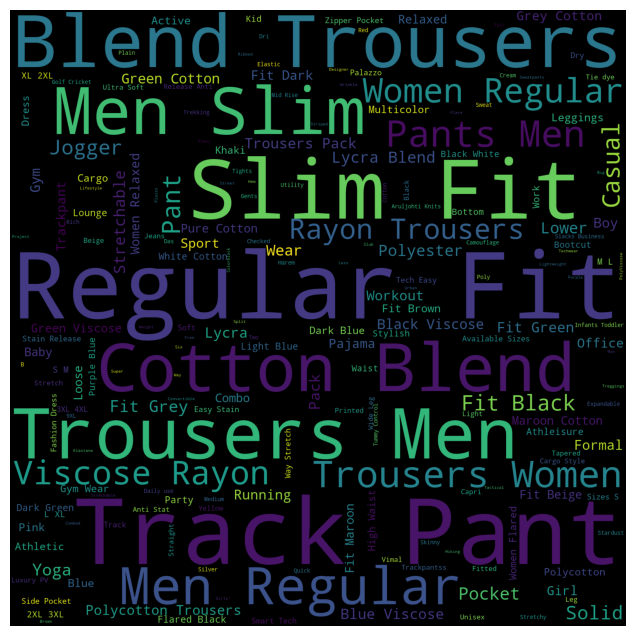

In [12]:
wordcloud = WordCloud(width = 1500, height = 1500).generate(' '.join(keyWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")



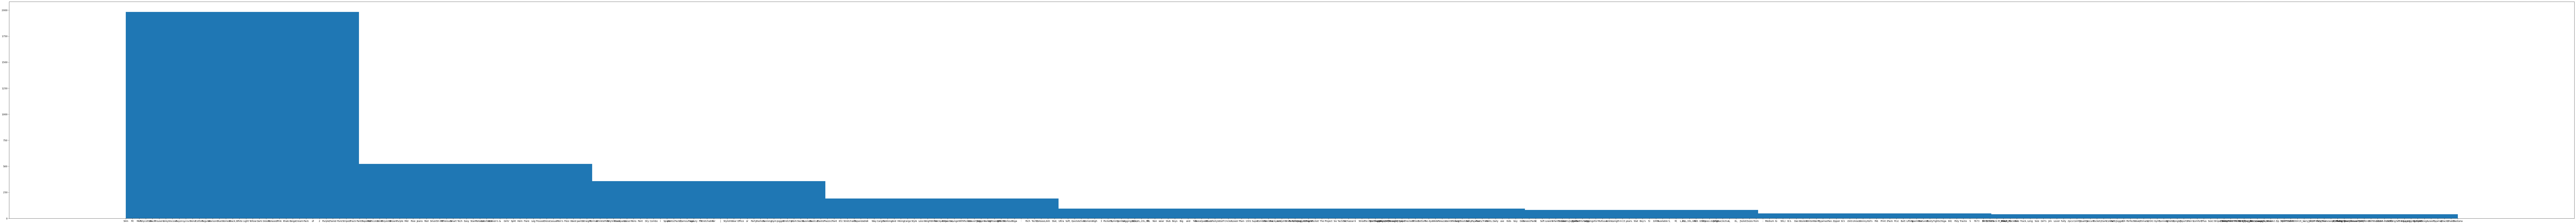

In [13]:
fig, ax = plt.subplots(figsize=(200, 17))
ax.hist(keyWords)

plt.show()


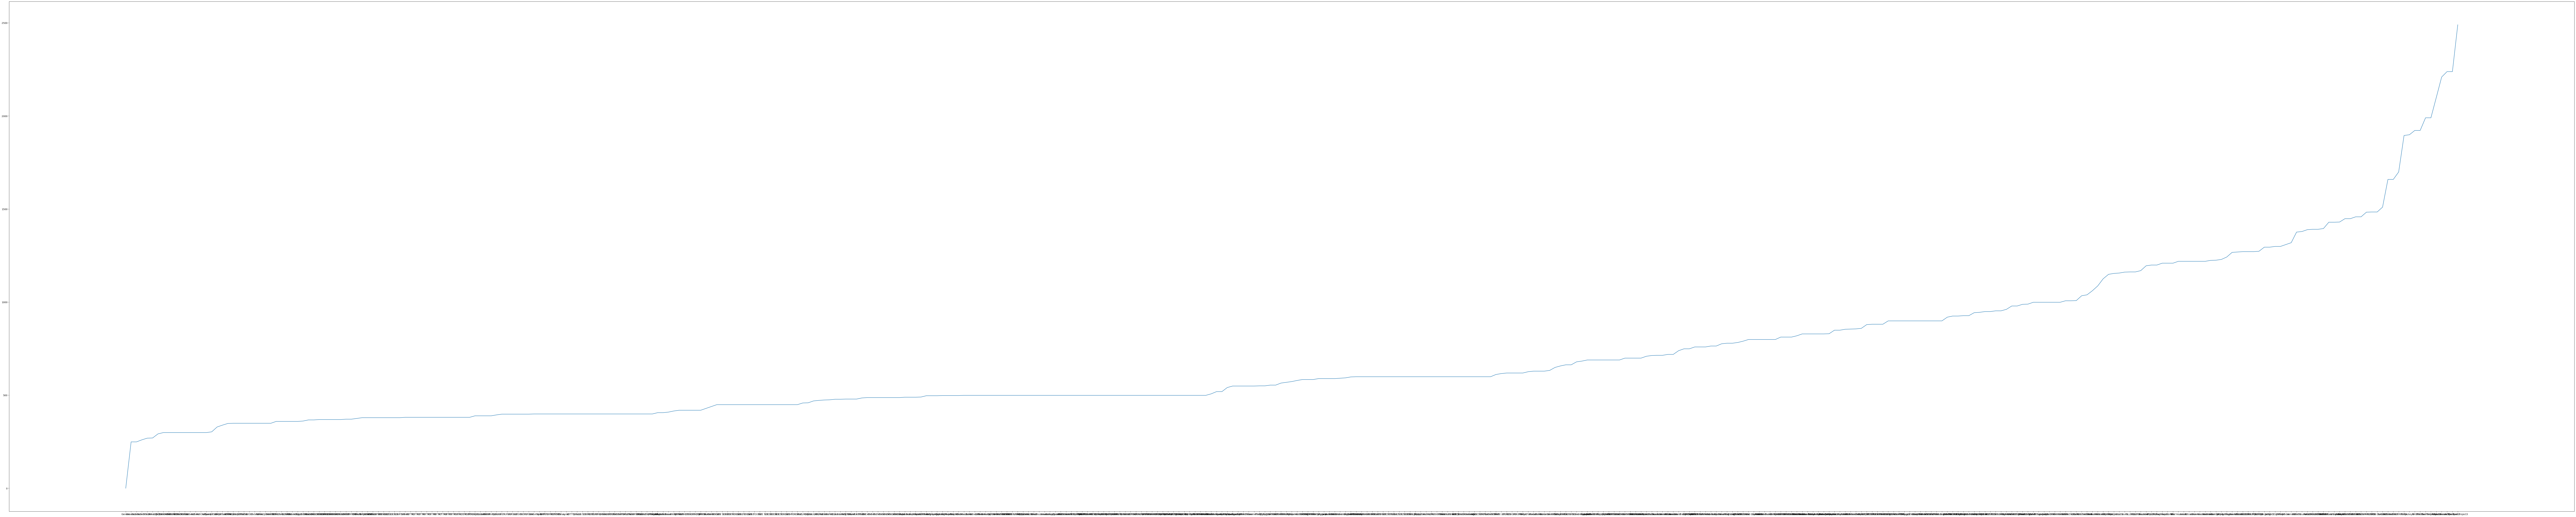

In [14]:
fig, ax = plt.subplots(figsize=(200, 40))
plt.plot(list(table.iloc[:,0]),list(table.iloc[:,2]))



In [15]:
print(set(keyWords))

{'Two', 'Tummy', 'Of', 'Fully', 'PolyViscose', 'Trouser', 'Set', 'Six', 'use', 'Multicolor', 'Hem', 'Striped', '.DAS', '(Single)', "Women's", 'Booty', 'Secure', '2pcs', 'Gents', '6)', 'Party', 'Elastana', 'Track-pant', 'Viscose', 'Men,', 'Ultra', 'Leggings,', 'Silver', 'pants', 'Pant|Casual', 'Less', 'Lower', 'Tie-Dye', 'Dress', 'Luxury', 'Rich', 'Fitskin2', 'Polycotton', 'Free', 'Stat,', '(S7673', 'Baby', 'Toddler', 'Work', '|High', 'Length', 'Party|Palazzo', 'Rise', 'pants(Pack', 'M,L,XL,2XL,3XL', '(204)', 'Pant', 'Maroon', 'Lycra', 'Cargos', 'Pants/Track', 'Track,', 'Gym', 'Chinos', 'x', 'Soft,', 'Khaki', 'Trousers', 'Capri', "Boy's", 'Medium', 'Jogger', 'Stat', 'Loose', 'Combo', 'Comfort', 'Pure', '9XL)', '(Yoga', 'Multiuse', 'Office', 'Side', 'Zipper', '2', '(Pant', '(Black)', 'Flared', 'Checked', 'Weight', 'Easy', 'Stretchable', 'Cricket', '2XL,3XL,4XL', 'Tapered', 'Blend', 'Poly', 'Women|Straight', 'Dri-FIT', 'Design', 'High', 'Pocket,', 'Tights', 'Jim', 'Pajama', 'Smart', '3/4t